# Step-1:Import Libraries

In [1]:
import numpy as np
import pandas as pd
import nltk
import re # Regular expressions
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

In [2]:
stop = stopwords.words('english')
stop.remove('not')

# Step-2 :Load Dataset

In [3]:
dataset = pd.read_csv('review.tsv',delimiter='\t',encoding='latin-1')

In [4]:
dataset.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


# Step-3: Extracting Data Frames into List

In [5]:
print(dataset.keys())
print(dataset.info())

Index(['Review', 'Liked'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
Review    1000 non-null object
Liked     1000 non-null int64
dtypes: int64(1), object(1)
memory usage: 15.7+ KB
None


In [6]:
x = dataset['Review']
y = dataset['Liked']

In [7]:
x

0                               Wow... Loved this place.
1                                     Crust is not good.
2              Not tasty and the texture was just nasty.
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
5         Now I am getting angry and I want my damn pho.
6                  Honeslty it didn't taste THAT fresh.)
7      The potatoes were like rubber and you could te...
8                              The fries were great too.
9                                         A great touch.
10                              Service was very prompt.
11                                    Would not go back.
12     The cashier had no care what so ever on what I...
13     I tried the Cape Cod ravoli, chicken, with cra...
14     I was disgusted because I was pretty sure that...
15     I was shocked because no signs indicate cash o...
16                                   Highly recommended.
17                Waitress was 

In [8]:
Review = x[0]
Review

'Wow... Loved this place.'

In [9]:
corpus = []
for Review in x:
    #  Step-1: Converting into Lower case
    review = Review.lower()
    # Step-2: Removing Special Characters and numbers
    review = re.sub('[^a-zA-Z]',' ',review)
    # Step-3:Converting into list -> since we need to work on words
    review = review.split()
    # Step-4: Stemming ->Identifying root words and removing stopwords
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stop)]
    review = ' '. join(review)
    corpus.append(review)
print(review)

wast enough life pour salt wound draw time took bring check


# Stemming

In [10]:
corpus

['wow love place',
 'crust not good',
 'not tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch',
 'servic prompt',
 'would not go back',
 'cashier care ever say still end wayyy overpr',
 'tri cape cod ravoli chicken cranberri mmmm',
 'disgust pretti sure human hair',
 'shock sign indic cash',
 'highli recommend',
 'waitress littl slow servic',
 'place not worth time let alon vega',
 'not like',
 'burritto blah',
 'food amaz',
 'servic also cute',
 'could care less interior beauti',
 'perform',
 'right red velvet cake ohhh stuff good',
 'never brought salad ask',
 'hole wall great mexican street taco friendli staff',
 'took hour get food tabl restaur food luke warm sever run around like total overwhelm',
 'worst salmon sashimi',
 'also combo like burger fri beer decent deal',
 'like final blow

# Bag of word model
**Count vectorization -Frequency Based model**

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

In [12]:
cv = CountVectorizer()

In [13]:
X_new = cv.fit_transform(corpus).toarray()
y = dataset['Liked'].values

In [14]:
cv.get_feature_names()

['absolut',
 'absolutley',
 'accid',
 'accommod',
 'accomod',
 'accordingli',
 'account',
 'ach',
 'acknowledg',
 'across',
 'actual',
 'ad',
 'afford',
 'afternoon',
 'ago',
 'ahead',
 'airlin',
 'airport',
 'ala',
 'albondiga',
 'allergi',
 'almond',
 'almost',
 'alon',
 'also',
 'although',
 'alway',
 'amaz',
 'ambianc',
 'ambienc',
 'amount',
 'ampl',
 'andddd',
 'angri',
 'annoy',
 'anoth',
 'anticip',
 'anymor',
 'anyon',
 'anyth',
 'anytim',
 'anyway',
 'apart',
 'apolog',
 'app',
 'appal',
 'appar',
 'appeal',
 'appet',
 'appetit',
 'appl',
 'approv',
 'area',
 'arepa',
 'aria',
 'around',
 'array',
 'arriv',
 'articl',
 'ask',
 'assur',
 'ate',
 'atmospher',
 'atroci',
 'attach',
 'attack',
 'attent',
 'attitud',
 'auju',
 'authent',
 'averag',
 'avocado',
 'avoid',
 'aw',
 'away',
 'awesom',
 'awkward',
 'awkwardli',
 'ayc',
 'az',
 'baba',
 'babi',
 'bachi',
 'back',
 'bacon',
 'bad',
 'bagel',
 'bakeri',
 'baklava',
 'ball',
 'bamboo',
 'banana',
 'bank',
 'bar',
 'bare',
 

In [15]:
print(len(cv.get_feature_names()))
print(cv.get_feature_names())

1566
['absolut', 'absolutley', 'accid', 'accommod', 'accomod', 'accordingli', 'account', 'ach', 'acknowledg', 'across', 'actual', 'ad', 'afford', 'afternoon', 'ago', 'ahead', 'airlin', 'airport', 'ala', 'albondiga', 'allergi', 'almond', 'almost', 'alon', 'also', 'although', 'alway', 'amaz', 'ambianc', 'ambienc', 'amount', 'ampl', 'andddd', 'angri', 'annoy', 'anoth', 'anticip', 'anymor', 'anyon', 'anyth', 'anytim', 'anyway', 'apart', 'apolog', 'app', 'appal', 'appar', 'appeal', 'appet', 'appetit', 'appl', 'approv', 'area', 'arepa', 'aria', 'around', 'array', 'arriv', 'articl', 'ask', 'assur', 'ate', 'atmospher', 'atroci', 'attach', 'attack', 'attent', 'attitud', 'auju', 'authent', 'averag', 'avocado', 'avoid', 'aw', 'away', 'awesom', 'awkward', 'awkwardli', 'ayc', 'az', 'baba', 'babi', 'bachi', 'back', 'bacon', 'bad', 'bagel', 'bakeri', 'baklava', 'ball', 'bamboo', 'banana', 'bank', 'bar', 'bare', 'bargain', 'bartend', 'base', 'basebal', 'basic', 'batch', 'bathroom', 'batter', 'bay', 'b

# Step-5: Spliting Data

In [16]:
from sklearn.cross_validation import train_test_split

C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [17]:
x_train, x_test, y_train, y_test = train_test_split(X_new,y,test_size = 0.2,random_state = 0)

# Step - 6: Buliding Machine Learing Model

In [18]:
from sklearn.naive_bayes import MultinomialNB,GaussianNB

In [19]:
model_M = MultinomialNB()
model_G = GaussianNB()

In [20]:
# Training model
model_M.fit(x_train,y_train)
model_G.fit(x_train,y_train)

GaussianNB(priors=None)

In [21]:
y_pred_M = model_M.predict(x_test)
y_pred_G = model_G.predict(x_test)

# Evaluation

In [22]:
from sklearn.metrics import confusion_matrix,classification_report

In [23]:
cm_M = confusion_matrix(y_test,y_pred_M)
cm_G = confusion_matrix(y_test,y_pred_G)

In [24]:
import seaborn as sns

In [25]:
import matplotlib.pyplot as plt

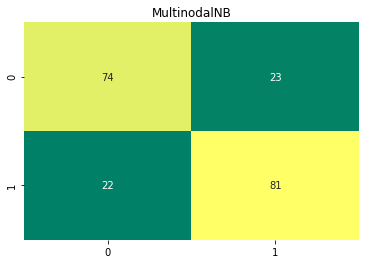

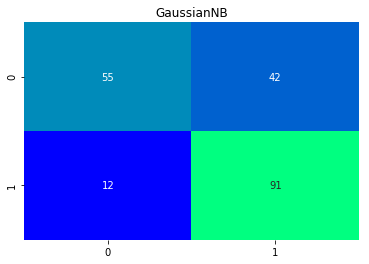

In [26]:
sns.heatmap(cm_M,annot = True , cbar = False,cmap ='summer')
plt.title('MultinodalNB')
plt.show()
sns.heatmap(cm_G,annot = True , cbar = False,cmap ='winter')
plt.title('GaussianNB')
plt.show()

In [27]:
cr_M = classification_report(y_test,y_pred_M)
cr_G = classification_report(y_test,y_pred_G)

In [28]:
print(cr_M)
print('='*50)
print(cr_G)

             precision    recall  f1-score   support

          0       0.77      0.76      0.77        97
          1       0.78      0.79      0.78       103

avg / total       0.77      0.78      0.77       200

             precision    recall  f1-score   support

          0       0.82      0.57      0.67        97
          1       0.68      0.88      0.77       103

avg / total       0.75      0.73      0.72       200



In [29]:
from sklearn.externals import joblib

In [30]:
joblib.dump(model_M,'nlp_multinodal.pkl')
joblib.dump(model_G,'nlp_gaussian.pkl')

['nlp_gaussian.pkl']

# Application

In [31]:
text = 'I love Machine Learning Class'

In [32]:
#  Step-1: Converting into Lower case
review = Review.lower()
# Step-2: Removing Special Characters and numbers
review = re.sub('[^a-zA-Z]',' ',review)
# Step-3:Converting into list -> since we need to work on words
review = review.split()
# Step-4: Stemming ->Identifying root words and removing stopwords
ps = PorterStemmer()
review = [ps.stem(word) for word in review if not word in set(stop)]
review = ' '. join(review)
print(review)

wast enough life pour salt wound draw time took bring check


In [33]:
review = [review]

In [34]:
review

['wast enough life pour salt wound draw time took bring check']

In [35]:
test = cv.transform(review).toarray()

In [36]:
model_M.predict(test)

array([0], dtype=int64)

In [37]:
review

['wast enough life pour salt wound draw time took bring check']